## SEAI 2021 - Python - Lab 1
# Intro to Python 

Vincenzo Nardelli - Niccolò Salvini

# Supported Vector Machines (SVM)

Support Vector Classifiers are **hard** classifiers (they do **not** produce a probability to belong to a class, instead they immediately assign obesrvation to the class).
SVM are quite new, they have been developed in the '90 and are intended for binary classification, though there are extensions that allow multiclass SVMs. They are able to set linear and non linear boundary classification. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))
iris.columns = ["sepal length","sepal width","petal length","petal width","class"]

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
#iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=iris.columns = ["sepal length","sepal width","petal length","petal width","class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
X = iris.drop("class",axis=1).values
Y = iris["class"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [6]:
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [7]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## SVM lineare with 2 features
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [8]:
X2_train = X_train[:,:2]
X2_test = X_test[:,:2]

In [9]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X2_train, Y_train)
print("ACCURACY with 2 properties: Train=%.4f Test=%.4f" % (svc.score(X2_train, Y_train), svc.score(X2_test,Y_test)))

ACCURACY with 2 properties: Train=0.8190 Test=0.7111


In [10]:
Y_pred = svc.predict(X2_test)


confusion_matrix(Y_test, Y_pred)

array([[14,  0,  0],
       [ 1,  8,  9],
       [ 0,  3, 10]])

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


def show_bounds(model,X,Y,labels=["Classe 0","Classe 1"], figsize=(12,10)):

    plt.figure(figsize=figsize)

    h = .02

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])
    plt.legend()


def plot_bounds(X,Y,model=None,classes=None, figsize=(8,6)):
        
    plt.figure(figsize=figsize)
        
    if(model):
        X_train, X_test = X
        Y_train, Y_test = Y
        X = np.vstack([X_train, X_test])
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                             np.arange(y_min, y_max, .02))

        if hasattr(model, "predict_proba"):
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        else:
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=.8)

    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
    plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, alpha=0.6)
    
    plt.show()

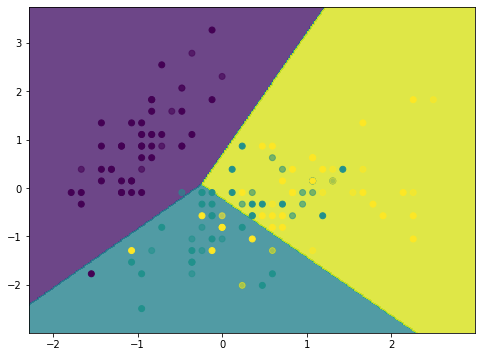

In [12]:
plot_bounds((X2_train,X2_test),(Y_train,Y_test),svc)

## Linear SVM with full features

In [13]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, Y_train)
print("ACCURACY con tutte le proprietà: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))

ACCURACY con tutte le proprietà: Train=0.9524 Test=0.8889


In [14]:
Y_pred = svc.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[14,  0,  0],
       [ 0, 14,  4],
       [ 0,  1, 12]])

## References

- Starmer, J. (2019). Support Vector Machines Part 1 (of 3): Main Ideas!!! YouTube. Available at: https://www.youtube.com/watch?v=efR1C6CvhmE [Accessed 23 Apr. 2021].
- Lorenzo Govoni. (2018). Algoritmo Support Vector Machine ITA | Lorenzo Govoni. [online] Available at: https://www.lorenzogovoni.com/support-vector-machine/ [Accessed 23 Apr. 2021].
- MonkeyLearn Blog. (2017). An Introduction to Support Vector Machines (SVM). [online] Available at: https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/ [Accessed 23 Apr. 2021].

